# ARM
### Author: Binaya Bajgain and Anup Ghimire <br />

**Dataset:** The happiness levels of people in 155 countries. <br />
**Source:-** The data was obtained from UN Sustainable Development Solutions Network (UNSDSN). <br />
            It is available through public domain license on www.unsdsn.org<br />
**Attributes of the Data:** GDP per Capita, Social Support, Healthy Life Expectancy, Freedom to make choices, <br />
                           Perception of Corruption and Score <br />
**Goal:** To find the most important factor when it comes to the general level of happiness among citizens of a country<br />
**Method:** Association Rule Mining (ARM) - Association Rule: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, binned_statistic
from sklearn.decomposition import PCA
from scipy.stats import chisquare
from scipy import stats


In [19]:
#Reading the csv file
df = pd.read_csv(r'./2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [20]:
# we do not need the overall rank and country columns
del df['Country or region']
del df['Overall rank']
df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [22]:
#We can also remove any rows that have 0.00 values
df = df[(df != 0).all(1)]
df

#It removed 6 rows. new dimension 150 rows X 7 columns

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
149,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147


# Next - making plots

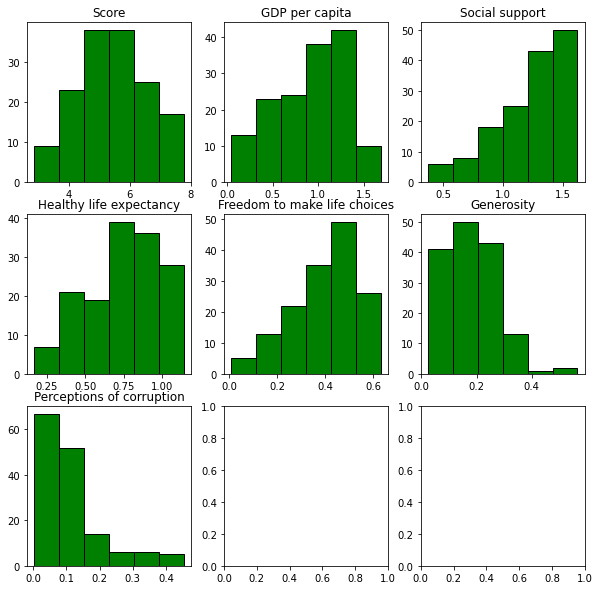

In [32]:
# First Histograms

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()

ax1.hist(df['Score'],   color='g', edgecolor='k', bins = 6)
ax1.set_title('Score')

ax2.hist(df['GDP per capita'],   color='g', edgecolor='k', bins = 6)
ax2.set_title('GDP per capita')

ax3.hist(df['Social support'],   color='g', edgecolor='k', bins = 6)
ax3.set_title('Social support')

ax4.hist(df['Healthy life expectancy'],   color='g', edgecolor='k', bins = 6)
ax4.set_title('Healthy life expectancy')

ax5.hist(df['Freedom to make life choices'],   color='g', edgecolor='k', bins = 6)
ax5.set_title('Freedom to make life choices')

ax6.hist(df['Generosity'],   color='g', edgecolor='k', bins = 6)
ax6.set_title('Generosity')

ax7.hist(df['Perceptions of corruption'],   color='g', edgecolor='k', bins = 6)
ax7.set_title('Perceptions of corruption')

plt.show()

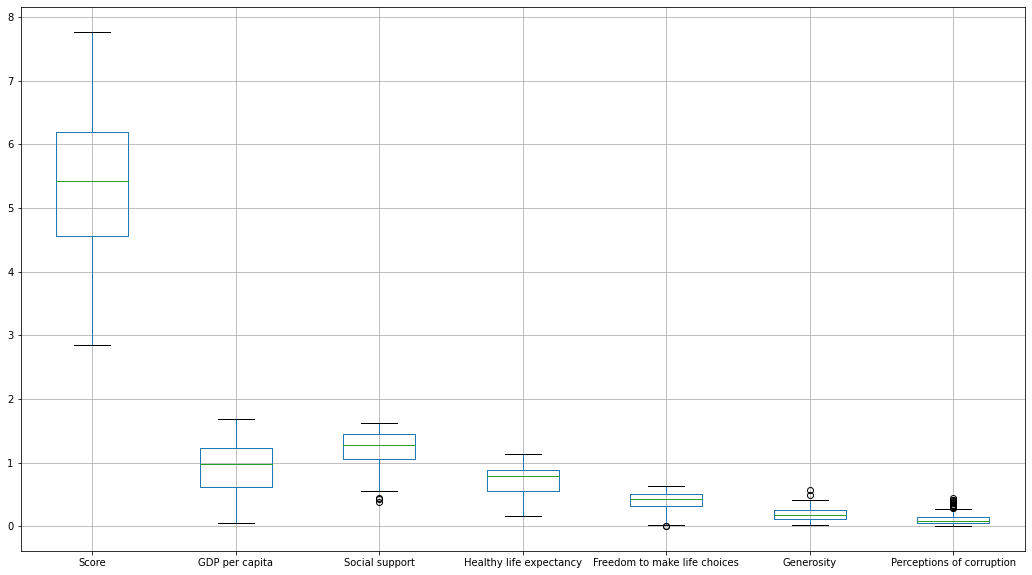

In [37]:
# Box-plot showing the distribution
plt.figure(figsize = (18,10))
df.boxplot()
plt.show()

 # Data Cleaning 
 Since the data has no missing values, next we can look into the outliers. We will remove the rows 
 where there are any values where the zscore is greater than abs(3)

In [41]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.describe()

# This shows we removed 6 rows from the dataset and now each datapoint is within abs(3) standard deviation from the mean.

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,5.467465,0.920667,1.230681,0.737917,0.396528,0.179236,0.105139
std,1.072540,0.387210,0.270309,0.226911,0.134113,0.086546,0.084258
min,2.853000,0.046000,0.437000,0.168000,0.010000,0.025000,0.004000
25%,4.617750,0.634250,1.066250,0.567000,0.312500,0.107750,0.050000
50%,5.431000,0.986000,1.293500,0.800000,0.417000,0.175500,0.085000
75%,6.193500,1.237250,1.454250,0.881750,0.498000,0.245250,0.133500
max,7.769000,1.684000,1.624000,1.122000,0.631000,0.419000,0.393000


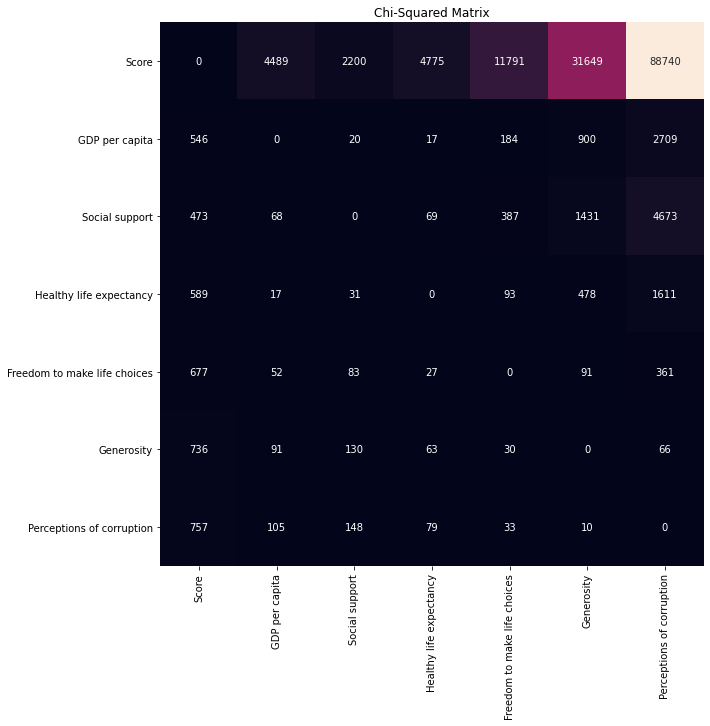

In [44]:
# Next step: Handling Redundancy using Chi-Square Test

chimat = np.zeros((7,7))
i = 0
for m in df:
    j = 0
    for n in df:
        cs = chisquare(df[m],df[n])
        chimat[i,j] = cs[0]
        j = j + 1
    i = i + 1
    
intMatrix = chimat.astype('int')
plt.figure(figsize = (10,10))
plt.title('Chi-Squared Matrix')
sns.heatmap(data =  intMatrix, square = True, annot = True, cbar = False, fmt = 'g',
           xticklabels = df.columns, yticklabels = df.columns)
plt.show()

*There seems to be no redundancies*

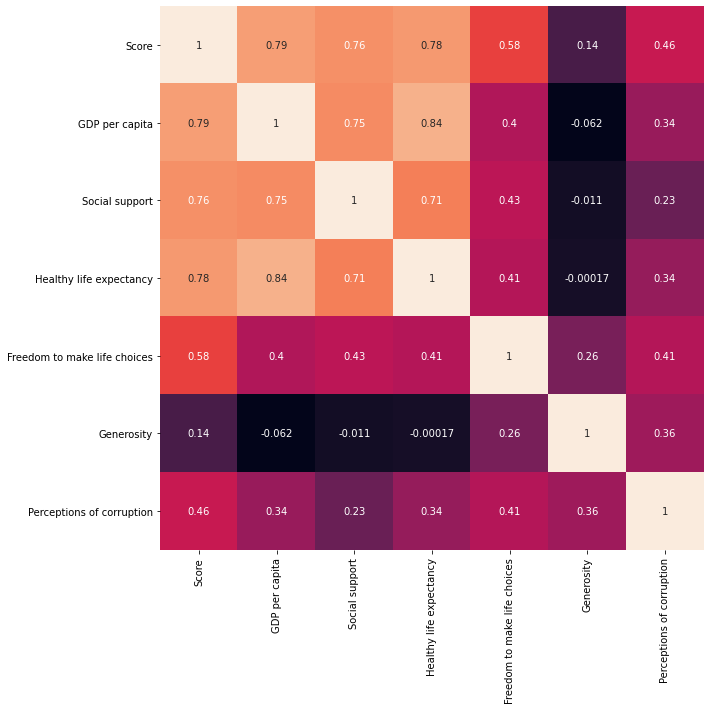

In [45]:
# Checking correlation between columns

cc = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(data = cc, annot = True, square = True, cbar = False,
           xticklabels = df.columns, yticklabels = df.columns)
plt.show()

<Figure size 720x720 with 0 Axes>

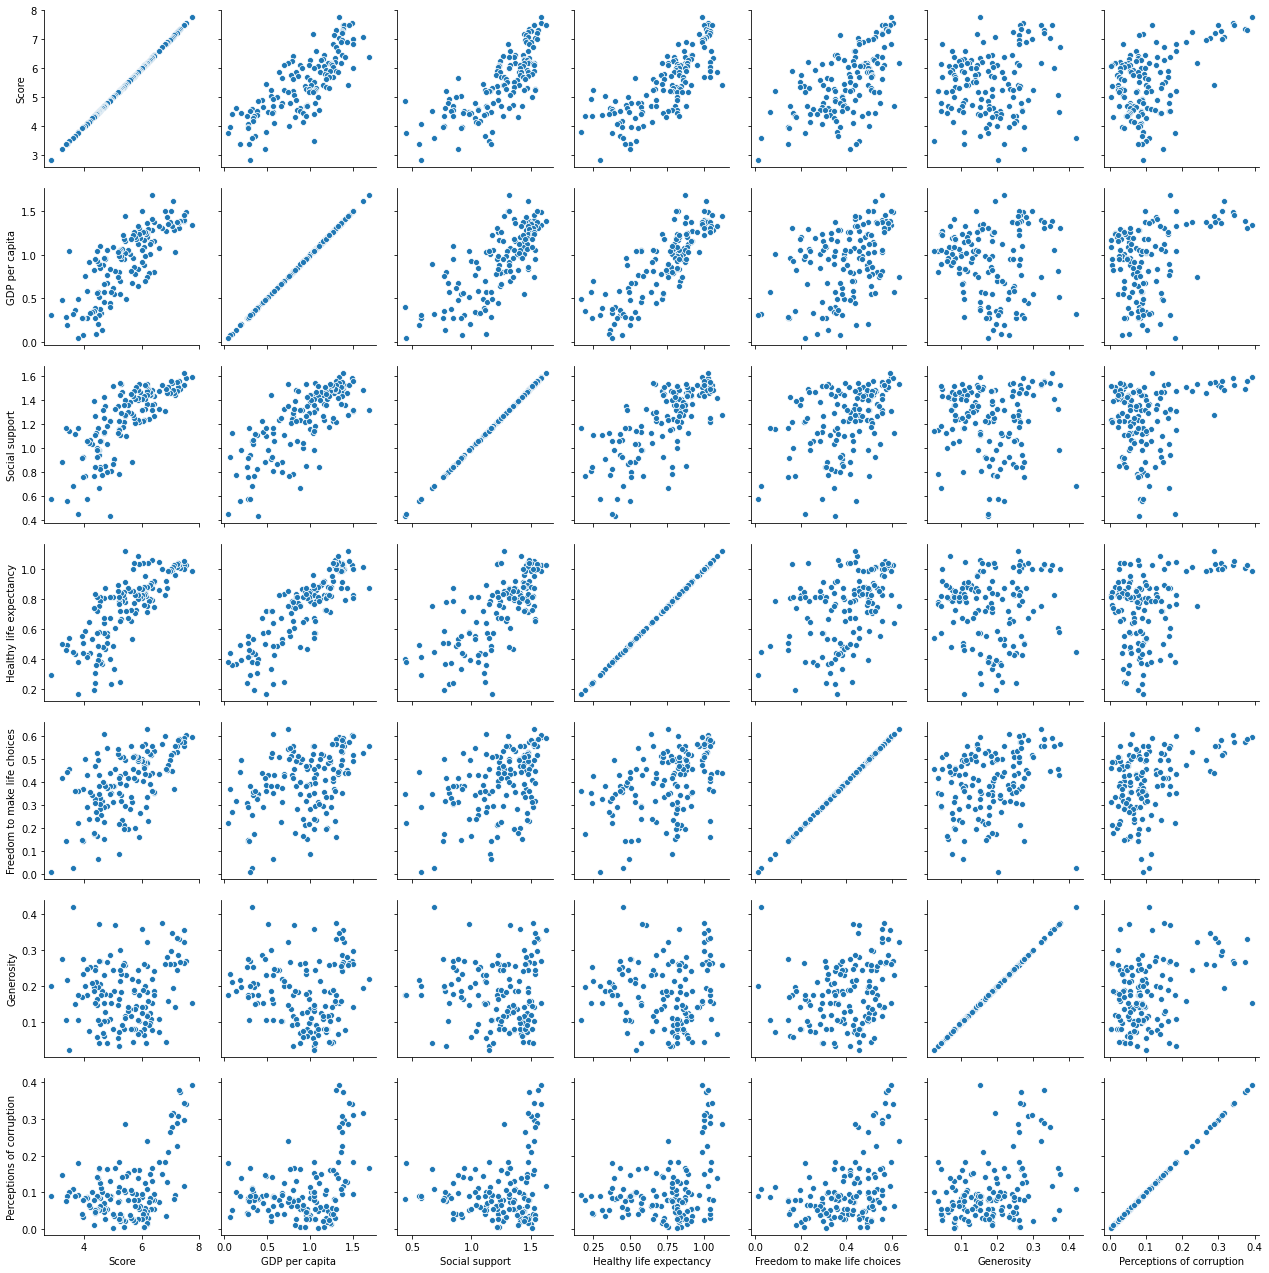

In [46]:
# Scatter-plot Matrix

plt.figure(figsize = (10,10))
sns.pairplot(data = df, kind = 'scatter', diag_kind = None)
plt.show()

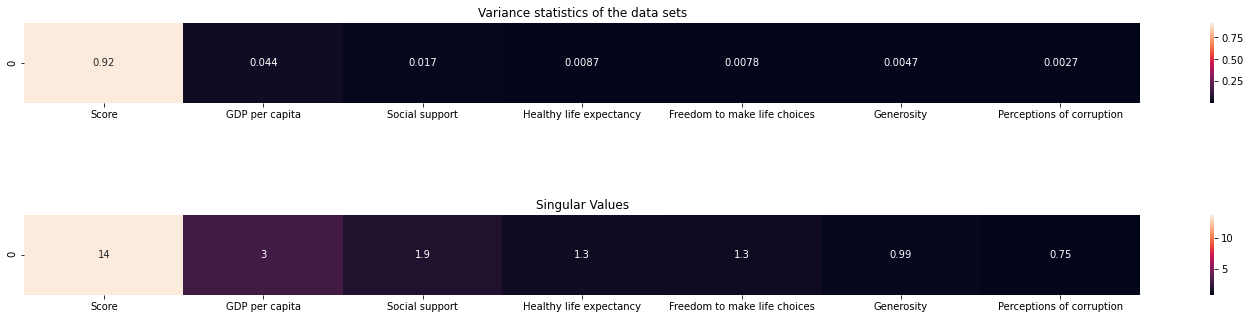

In [47]:
# Dimensionality Reduction using PCA

pca = PCA()
pca.fit(df)

plt.figure(figsize = (25,5))
plt.subplot(3,1,1)
ax= sns.heatmap(data = [pca.explained_variance_ratio_], annot = True)
ax.set_xticklabels(df.columns)
plt.title('Variance statistics of the data sets')

plt.subplot(3,1,3)
ax = sns.heatmap(data = [pca.singular_values_], annot = True)
ax.set_xticklabels(df.columns)
plt.title('Singular Values')
plt.show()

Singular Values from the **PCA** calculation shows that *Generosity* and *Perceptions of corruption* have values less than 1. I decided to keep Generosity for being almost 1 but decided to drop the Perceptions of Corruption. Another thing, the score has the highest value. Since, **score** is not an independent value but a numerical representation of all the attributes combined and cannot be directly measured - I decided to drop it as well.

In [53]:
del df['Perceptions of corruption']
del df['Score']
df

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,1.340,1.587,0.986,0.596,0.153
2,1.488,1.582,1.028,0.603,0.271
3,1.380,1.624,1.026,0.591,0.354
4,1.396,1.522,0.999,0.557,0.322
5,1.452,1.526,1.052,0.572,0.263
...,...,...,...,...,...
147,1.041,1.145,0.538,0.455,0.025
149,0.191,0.560,0.495,0.443,0.218
150,0.287,1.163,0.463,0.143,0.108
152,0.476,0.885,0.499,0.417,0.276


# Dividing all the data into Two categories - High and Low


In [62]:
nbins = 2 #high and low
Labels = ['High', 'Low']
dfcategory = pd.DataFrame()

dfcategory['GDP per capita'] = pd.cut(df['GDP per capita'],nbins  )
dfcategory['Social support'] = pd.cut(df['Social support'],nbins  )
dfcategory['Healthy life expectancy'] = pd.cut(df['Healthy life expectancy'],nbins )
dfcategory['Freedom to make life choices'] = pd.cut(df['Freedom to make life choices'],nbins)
dfcategory['Generosity'] = pd.cut(df['Generosity'],nbins )

dfcategory

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,"(0.865, 1.684]","(1.03, 1.624]","(0.645, 1.122]","(0.32, 0.631]","(0.0246, 0.222]"
2,"(0.865, 1.684]","(1.03, 1.624]","(0.645, 1.122]","(0.32, 0.631]","(0.222, 0.419]"
3,"(0.865, 1.684]","(1.03, 1.624]","(0.645, 1.122]","(0.32, 0.631]","(0.222, 0.419]"
4,"(0.865, 1.684]","(1.03, 1.624]","(0.645, 1.122]","(0.32, 0.631]","(0.222, 0.419]"
5,"(0.865, 1.684]","(1.03, 1.624]","(0.645, 1.122]","(0.32, 0.631]","(0.222, 0.419]"
...,...,...,...,...,...
147,"(0.865, 1.684]","(1.03, 1.624]","(0.167, 0.645]","(0.32, 0.631]","(0.0246, 0.222]"
149,"(0.0444, 0.865]","(0.436, 1.03]","(0.167, 0.645]","(0.32, 0.631]","(0.0246, 0.222]"
150,"(0.0444, 0.865]","(1.03, 1.624]","(0.167, 0.645]","(0.00938, 0.32]","(0.0246, 0.222]"
152,"(0.0444, 0.865]","(0.436, 1.03]","(0.167, 0.645]","(0.32, 0.631]","(0.222, 0.419]"


In [63]:
DFBinnedCategorical = pd.DataFrame()

DFBinnedCategorical['GDP per capita'] = pd.cut(df['GDP per capita'],nBins  , labels = Labels)
DFBinnedCategorical['Social support'] = pd.cut(df['Social support'],nBins  , labels = Labels)
DFBinnedCategorical['Healthy life expectancy'] = pd.cut(df['Healthy life expectancy'],nBins , labels = Labels)
DFBinnedCategorical['Freedom to make life choices'] = pd.cut(df['Freedom to make life choices'],nBins , labels = Labels)
DFBinnedCategorical['Generosity'] = pd.cut(df['Generosity'],nBins , labels = Labels)

# Generating Features

In [64]:
high_category = np.zeros(156, dtype='int')
low_category =  np.zeros(156, dtype='int')

dfCategorical = pd.DataFrame()


for i in range(len(DFBinnedCategorical)):
  if (DFBinnedCategorical['GDP per capita'].iloc[i] == 'Low'):
    low_category[i] = 1
  else:
    low_category[i] = 0
  
  if (DFBinnedCategorical['GDP per capita'].iloc[i] == 'High'):
    high_category[i] = 1
  else:
    high_category[i] = 0

dfCategorical['High_GDP'] = high_category
dfCategorical['Low_GDP'] = low_category

for i in range(len(DFBinnedCategorical)):
  if (DFBinnedCategorical['Social support'].iloc[i] == 'Low'):
    low_category[i] = 1
  else:
    low_category[i] = 0
  
  if (DFBinnedCategorical['Social support'].iloc[i] == 'High'):
    high_category[i] = 1
  else:
    high_category[i] = 0

dfCategorical['High_SocialSupport'] = high_category
dfCategorical['Low_SocialSupport'] = low_category

for i in range(len(DFBinnedCategorical)):
  if (DFBinnedCategorical['Healthy life expectancy'].iloc[i] == 'Low'):
    low_category[i] = 1
  else:
    low_category[i] = 0
  
  if (DFBinnedCategorical['Healthy life expectancy'].iloc[i] == 'High'):
    high_category[i] = 1
  else:
    high_category[i] = 0

dfCategorical['High_LifeExpectancy'] = high_category
dfCategorical['Low_LifeExpectancy'] = low_category

for i in range(len(DFBinnedCategorical)):
  if (DFBinnedCategorical['Freedom to make life choices'].iloc[i] == 'Low'):
    low_category[i] = 1
  else:
    low_category[i] = 0
  
  if (DFBinnedCategorical['Freedom to make life choices'].iloc[i] == 'High'):
    high_category[i] = 1
  else:
    high_category[i] = 0

dfCategorical['High_Freedom'] = high_category
dfCategorical['Low_Freedom'] = low_category


for i in range(len(DFBinnedCategorical)):
  if (DFBinnedCategorical['Generosity'].iloc[i] == 'Low'):
    low_category[i] = 1
  else:
    low_category[i] = 0
  
  if (DFBinnedCategorical['Generosity'].iloc[i] == 'High'):
    high_category[i] = 1
  else:
    high_category[i] = 0

dfCategorical['High_Generosity'] = high_category
dfCategorical['Low_Generosity'] = low_category

In [65]:
dfCategorical

,High_GDP,Low_GDP,High_SocialSupport,Low_SocialSupport,High_LifeExpectancy,Low_LifeExpectancy,High_Freedom,Low_Freedom,High_Generosity,Low_Generosity
0,0,1,0,1,0,1,0,1,1,0
1,0,1,0,1,0,1,0,1,0,1
2,0,1,0,1,0,1,0,1,0,1
3,0,1,0,1,0,1,0,1,0,1
4,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
151,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0


# Finally generating and analyzing rules using Apriori Algorithm
*References: https://intellipaat.com/blog/data-science-apriori-algorithm/*
             *https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/*

In [70]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\prati\anaconda3\lib\site-packages (from scikit-learn>=0.20.3->mlxtend) (2.1.0)



In [74]:
from mlxtend.frequent_patterns import apriori as ap

In [83]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=cc2278280d02cffb0049c83da4d378d217c5e8782ab411e16984c32731bd5301
  Stored in directory: c:\users\prati\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [84]:
from apyori import apriori

In [75]:
rules = ap(dfCategorical, min_support=0.1, use_colnames=True, verbose = 1)
rules

Processing 6 combinations | Sampling itemset size 6


,support,itemsets
0,0.365385,(High_GDP)
1,0.557692,(Low_GDP)
2,0.198718,(High_SocialSupport)
3,0.724359,(Low_SocialSupport)
4,0.282051,(High_LifeExpectancy)
...,...,...
86,0.108974,"(High_Freedom, Low_LifeExpectancy, High_Genero..."
87,0.294872,"(Low_LifeExpectancy, High_Generosity, Low_Soci..."
88,0.185897,"(Low_Generosity, Low_LifeExpectancy, Low_Socia..."
89,0.237179,"(Low_GDP, Low_SocialSupport, High_Generosity, ..."


# Analyzing Rules

*References: https://towardsdatascience.com/association-rules-2-aa9a77241654 *
Using support, Confidence and Lift values to find the most important factor in general happiness among citizens
High support, high confidence and Lift value greater than 1 signifies the high association between two quantities. 
We will see what combination is the most important

In [77]:
Categories = dfCategorical.columns
def FormatAsBasket(d):
    for c in Categories:
        if d[c]>0:
            d[c]=c
    return d

In [78]:
dfTran = dfCategorical.apply(FormatAsBasket, axis =1)
vals = dfTran.values

vals = [rem[~(rem == 0)].tolist() for rem in vals if rem[rem != 0].tolist()] #Removing all the 0s from each row

In [92]:
Rules = []
Support = []
Confidence = []
Lift = []

results = list(apriori(vals,min_support = 0.00025, min_confidence = 0.00025,min_length=2,min_lift=1.50, target = 'results'))

for r in results:
    pair = r[0]
    items = [x for x in pair]
    Rules.append(str(items[0] + '>' + items[1]))
    Support.append(r[1])
    Confidence.append(r[2][0][2])
    Lift.append(r[2][0][3])
 
dfRules = pd.DataFrame()
dfRules['Rules'] = np.array(Rules)
dfRules['Support'] = np.array(Support)
dfRules['Confidence'] = np.array(Confidence)
dfRules['Lift'] = np.array(Lift)

#dfRules.sort_values(by = ['Support'], ascending = False)
dfRules.to_csv('Results_Table.csv')

In [93]:
dfRules

,Rules,Support,Confidence,Lift
0,High_Freedom>High_LifeExpectancy,0.125000,0.461538,1.510490
1,High_Freedom>High_SocialSupport,0.090278,0.333333,1.548387
2,High_LifeExpectancy>High_GDP,0.263889,0.666667,2.181818
3,High_SocialSupport>High_GDP,0.180556,0.456140,2.118846
4,High_SocialSupport>High_LifeExpectancy,0.173611,0.568182,2.639296
...,...,...,...,...
74,High_GDP>Low_SocialSupport,0.027778,0.070175,2.526316
75,High_GDP>Low_SocialSupport,0.034722,0.057471,1.655172
76,Low_GDP>Low_SocialSupport,0.020833,0.038462,1.846154
77,Low_GDP>High_Generosity,0.013889,0.029412,2.117647


**Looking at the support values, Confidence and Lift values - High Life Expectancy and High GDP seem to be very correlated**
*The other factors important are High Social Support leads to High GDP and High Life Expectancy*
*And finally, High Life expectancy seems to 